# L3: Text clustering and topic modelling

Text clustering groups documents in such a way that documents within a group are more &lsquo;similar&rsquo; to other documents in the cluster than to documents not in the cluster. The exact definition of what &lsquo;similar&rsquo; means in this context varies across applications and clustering algorithms.

In this lab you will experiment with both hard and soft clustering techniques. More specifically, in the first part you will be using the $k$-means algorithm, and in the second part you will be using a topic model based on the Latent Dirichlet Allocation (LDA).

## Hard clustering data set

The raw data for the hard clustering part of this lab is a collection of product reviews. We have preprocessed the data by tokenization and lowercasing.

In [1]:
import pandas as pd
import bz2

with bz2.open('reviews.json.bz2') as source:
    df = pd.read_json(source)

When you inspect the data frame, you can see that there are three labelled columns: `category` (the product category), `sentiment` (whether the product review was classified as &lsquo;positive&rsquo; or &lsquo;negative&rsquo; towards the product), and `text` (the space-separated text of the review).

In [2]:
df.head()

,category,sentiment,text
0,music,neg,i bought this album because i loved the title ...
1,music,neg,i was misled and thought i was buying the enti...
2,books,neg,"i have introduced many of my ell , high school..."
3,books,pos,anything you purchase in the left behind serie...
4,dvd,pos,"i loved these movies , and i cant wiat for the..."


## Problem 1: K-means clustering

Your first task is to cluster the product review data using a tf–idf vectorizer and a $k$-means clusterer.

Start by doing the vectorization. In connection with vectorization, you should also filter out standard English stop words. While you could use [spaCy](https://spacy.io/) for this task, here it suffices to use the word list implemented in [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html).

In [3]:
# TODO: Enter code here to vectorize the data and store it in a variable `reviews`
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
Vector = TfidfVectorizer(analyzer = 'word',stop_words='english')
y = df['text']
reviews = Vector.fit_transform(y)

Test your vectorization by running the following code cell:

In [4]:
reviews.shape

(11914, 46619)

If you used the English stop word list from scikit-learn, then the resulting vocabulary should have 46,619 entries.

Next, cluster the vectorized data. Before doing so, you should read the documentation of the [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) class, which is scikit-learn&rsquo;s implementation of the $k$-means algorithm. As you can see, this class has several parameters that you can tweak. For now, the only parameter that you will have to set is the number of clusters. We recommend that you choose $k=3$.

**Tip:** Training $k$-means models will take some time. To speed things up, you can use the `n_init` parameter to control the number of times that the clustering is re-computed with different initial values. The default value for this parameter is 10; here and in the rest of this lab, you may want to set this to a lower value.

In [5]:
# TODO: Enter code here to cluster the vectorized data
model = KMeans(n_clusters=3,random_state=12345)

In [6]:
model.fit(reviews)

KMeans(n_clusters=3, random_state=12345)

To sanity-check your clustering, create a bar plot with the number of documents per cluster.

<AxesSubplot:>

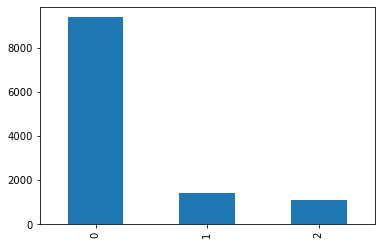

In [7]:
# TODO: Enter code here to produce a bar plot of the cluster size
height = pd.value_counts(model.labels_)
height.plot(kind='bar')

Note that sizes may vary considerable between clusters and among different random seeds.

## Problem 2: Summarize clusters

Once you have a clustering, you can try to see whether it is meaningful. One useful technique in that context is to generate a **summary** for each cluster by extracting the $n$ highest-weighted terms from the centroid of each cluster. Your next task is to implement this approach.

**Hint:** You will need to construct an &lsquo;inverted vocabulary&rsquo; that allows you to map from the index of a term back to the original term.

In [8]:
import numpy as np
word = {v:k for k,v in Vector.vocabulary_.items()}

In [9]:
# TODO: Enter code here to compute the cluster summaries and print them
def summary(model,n):
    gg = list()
    centroids = model.cluster_centers_
    highest_count = np.argsort(centroids, axis=1)[:, -n:]
    for i, idxs in enumerate(highest_count):
        index = highest_count[i,:]
        g = {i:[word[j] for j in index]}
        gg.append(g)
    return(gg)

In [10]:
summary(model,10)

[{0: ['time',
   'use',
   'album',
   'cd',
   'good',
   'just',
   'great',
   'movie',
   'product',
   'like']},
 {1: ['good',
   'just',
   'like',
   'quot',
   'story',
   'reading',
   'author',
   'books',
   'read',
   'book']},
 {2: ['great',
   'quality',
   'flash',
   'battery',
   'use',
   'digital',
   'canon',
   'pictures',
   'lens',
   'camera']}]

Once you have computed the cluster summaries, discuss their quality. Is it clear what the reviews in a given cluster are about? Which clusters are clearest? Which are less clear? Do the cluster summaries contain any unexpected terms? What happens if you re-cluster with, say, $k=6$?

The clusters formed are clear and the most clear cluster is cluster 2. The cluster 2 is review is about camera and it feature. 

The cluster 0 contain words about movies and albums.  
The cluster 1 contain word about books.  
The cluster 2 contain words about camera.  

In [11]:
model1 = KMeans(n_clusters=6)
model1.fit(reviews)

KMeans(n_clusters=6)

In [12]:
summary(model1,10)

[{0: ['time',
   'love',
   'really',
   'just',
   'dvd',
   'great',
   'good',
   'like',
   'film',
   'movie']},
 {1: ['time',
   'work',
   'does',
   'used',
   'easy',
   'hair',
   'program',
   'software',
   'use',
   'product']},
 {2: ['good',
   'written',
   'just',
   'story',
   'like',
   'reading',
   'author',
   'books',
   'read',
   'book']},
 {3: ['good',
   'great',
   'song',
   'like',
   'just',
   'music',
   'album',
   'cd',
   'book',
   'quot']},
 {4: ['great',
   'quality',
   'battery',
   'flash',
   'use',
   'digital',
   'canon',
   'pictures',
   'lens',
   'camera']},
 {5: ['good',
   'band',
   'great',
   'just',
   'like',
   'song',
   'songs',
   'music',
   'cd',
   'album']}]

*TODO: Insert your analysis of the clusters here*

When number of cluster is 6, The cluster formed had more different words which should not be in the cluster. In cluster 0, the cluster explains about software but the word "hair" does not belong in this cluster. There are two clusters formed based on music. We are basically forcing the algorithm to form more clusters than required, or K-means is not competent to find smaller topic before divide one bigger cluster.

 This shows two weakness of too many clusters:1, small clusters are more sensitive to noise on boundary between different clusters. 2,Too many clusters might wrongly divide a topic into different clusters.

Consider a case we have a topic with 1000 observations and want to find another topic with 100 observations. We should not blame K-means for the second weakness.

## Problem 3: Compare clusterings using the Rand index

In some scenarios, you may have gold-standard class labels available for at least a subset of your documents. In these cases you can compute the **Rand index** of a clustering, and use this measure to compare the quality of different clusterings.

To compute the Rand index, we view a clustering as a binary classifier on (unordered) pairs of documents. The classifier predicts &lsquo;positive&rsquo; if and only if the two documents belong to the same cluster. The (non-normalized) Rand index of the clustering is the accuracy of this classifier relative to a reference in which a document pair belongs to the &lsquo;positive&rsquo; class if and only if the two documents in the pair have the same gold-standard class label.

Compare clusterings with $k \in \{1,3,5,7\}$ clusters. As your evaluation data, use the first 500 documents from the original data set along with their gold-standard categories (from the `category` column). What do you observe? How do you interpret your observations?

In [13]:
# TODO: Enter code here to compute the Rand indices for the two clusterings
from sklearn.metrics import silhouette_score
from itertools import combinations
from scipy.special import comb

k = [1,3,5,7]
test = df[:500]
y_true = test.category
x_test = reviews[:500]

def rand_score (labels_true, labels_pred):
    my_pair = list(combinations(range(len(labels_true)), 2))
    def is_equal(x):
        return (x[0]==x[1])
    my_a = 0
    my_b = 0
    for i in range(len(my_pair)):
            if(is_equal((labels_true[my_pair[i][0]],labels_true[my_pair[i][1]])) == is_equal((labels_pred[my_pair[i][0]],labels_pred[my_pair[i][1]])) 
               and is_equal((labels_pred[my_pair[i][0]],labels_pred[my_pair[i][1]])) == True):
                my_a += 1
            if(is_equal((labels_true[my_pair[i][0]],labels_true[my_pair[i][1]])) == is_equal((labels_pred[my_pair[i][0]],labels_pred[my_pair[i][1]])) 
               and is_equal((labels_pred[my_pair[i][0]],labels_pred[my_pair[i][1]])) == False):
                my_b += 1
    my_denom = comb(len(labels_true),2)
    ri = (my_a + my_b) / my_denom
    return ri

rand_list = list()
for i in k:
        model2 = KMeans(n_clusters=i)
        model2.fit(reviews)
        y_predict = model2.predict(x_test)
        rand_list.append(rand_score(labels_true=y_true,labels_pred=y_predict))

In [14]:
for i in range(4):
    print(f"The rand score for K = {k[i]} is {rand_list[i]}")

The rand score for K = 1 is 0.16626052104208416
The rand score for K = 3 is 0.5614589178356714
The rand score for K = 5 is 0.6764729458917835
The rand score for K = 7 is 0.7626773547094189


*TODO: Insert your discussion of your results here*

We can see the with higher K, the Rand index is larger. This suggest that our assumption in last problem is right, which means even we find two clusters share the same topic, there are still unidentified topic remained.


## Topic modelling data set

The data set for the topic modelling part of this lab is the collection of all [State of the Union](https://en.wikipedia.org/wiki/State_of_the_Union) addresses from the years 1975–2000. These speeches come as a single text file with one sentence per line. The following code cell prints the first 5 lines from the data file:

In [15]:
with open('sotu_1975_2000.txt') as source:
    for i, line in enumerate(source):
        print(line.rstrip())
        if i >= 5:
            break

mr speaker mr vice president members of the 94th congress and distinguished guests
twenty six years ago a freshman congressman a young fellow with lots of idealism who was out to change the world stood before sam rayburn in the well of the house and solemnly swore to the same oath that all of you took yesterday an unforgettable experience and i congratulate you all
two days later that same freshman stood at the back of this great chamber over there someplace as president truman all charged up by his single handed election victory reported as the constitution requires on the state of the union
when the bipartisan applause stopped president truman said i am happy to report to this 81st congress that the state of the union is good our nation is better able than ever before to meet the needs of the american people and to give them their fair chance in the pursuit of happiness it is foremost among the nations of the world in the search for peace
today that freshman member from michigan stan

Take a few minutes to think about what topics you would expect in this data set.

The brief of some politicans of state of the union in United States. The congressman talks unemployment and economy.  They focus more on how the congressman had satisfied the american people than the previous party.

## Problem 4: Train a topic model

Your first task on the topic modelling data is to train an LDA model. For this task you will be using [spaCy](https://spacy.io/) and the [gensim](https://radimrehurek.com/gensim/) topic modelling library.

Start by preprocessing the data using spaCy. Given that the data set for this problem is rather small, you do not have to exclude any components from the standard pipeline. Filter out stop words, non-alphabetic tokens, and tokens less than 3 characters in length. Store the documents as a nested list where the first level of nesting corresponds to the sentences and the second level corresponds to the tokens in each sentence.

In [16]:
# TODO: Replace the following lines with your own code for preprocessing the documents
import spacy
nlp = spacy.load("en_core_web_sm")
def preprocess(text):
    doc = nlp(text)
    token_list = []
    for token in doc:
        if token.is_stop == False and token.lemma_.isalpha() == True and len(token)>=3:
            token_list.append(token.lemma_)
    return token_list

with open('sotu_1975_2000.txt') as source:
    documents = [preprocess(line) for line in source]
        

Test your preprocessing by running the following cell:

In [17]:
' '.join(documents[42])

'reduce oil import million barrel day end year million barrel day end'

You should get the following output:

Once you have the list of documents, skim the section [Pre-process and vectorize the documents](https://radimrehurek.com/gensim/auto_examples/tutorials/run_lda.html#pre-process-and-vectorize-the-documents) of the gensim documentation to learn how to create the dictionary and the vectorized corpus representation required by gensim. (Note that you cannot use the standard scikit-learn pipeline in this case.) Then, write code to train an [LdaModel](https://radimrehurek.com/gensim/models/ldamodel.html) for $k=10$ topics, and using default values for all other parameters.

In [18]:
# TODO: Enter code here to train an LDA model and store it in a variable `model`
from gensim.models import LdaModel
from gensim.corpora import Dictionary
# create a dictionary
dictionary = Dictionary(documents)
# Bag-of-words representation of the documents.
corpus = [dictionary.doc2bow(doc) for doc in documents]

# Set training parameters.
num_topics = 10

model = LdaModel(
    corpus=corpus,
    num_topics=num_topics,
    id2word=dictionary
)

Once you have a trained model, run the following cell to print the topics:

In [19]:
model.print_topics()

[(0,
  '0.018*"school" + 0.015*"child" + 0.008*"grade" + 0.008*"parent" + 0.008*"covenant" + 0.008*"year" + 0.007*"work" + 0.007*"house" + 0.006*"help" + 0.006*"new"'),
 (1,
  '0.017*"work" + 0.016*"year" + 0.011*"care" + 0.010*"congress" + 0.010*"americans" + 0.010*"million" + 0.009*"health" + 0.009*"need" + 0.009*"new" + 0.008*"people"'),
 (2,
  '0.017*"year" + 0.017*"child" + 0.012*"family" + 0.011*"people" + 0.009*"america" + 0.009*"work" + 0.008*"cut" + 0.007*"new" + 0.006*"thank" + 0.006*"parent"'),
 (3,
  '0.018*"year" + 0.014*"america" + 0.010*"american" + 0.009*"people" + 0.008*"nation" + 0.008*"security" + 0.008*"work" + 0.007*"new" + 0.007*"world" + 0.007*"welfare"'),
 (4,
  '0.023*"year" + 0.018*"people" + 0.012*"america" + 0.011*"work" + 0.008*"government" + 0.008*"world" + 0.008*"let" + 0.008*"american" + 0.006*"child" + 0.006*"congress"'),
 (5,
  '0.013*"college" + 0.013*"new" + 0.011*"education" + 0.010*"year" + 0.007*"opportunity" + 0.006*"american" + 0.006*"economic" 

Inspect the topics. Can you &lsquo;label&rsquo; each topic with a short description of what it is about? Do the topics match your expectations? Summarize your discussion in a short text.

*TODO: Insert your discussion of the topics here*

The #i topic is about:

0: Quantity of jobs,which also involves tax,bussiness and family.

1: New thing about right, regarding community and nation, law and program involed.

2: Also about work, but "american" and "america" suggests this topic is about individual and government. "welfare" is also included.

3: Work and security of social, americans' life might be discussed.

4: Children,which involves school,parent,and teacher.

5: Budget from congress, which might is about some program about work.

6: Children again, which involves health care.

7: Work and economy.

8: Challenge.

9: We cannot lable this one, it is too messy.

In genreal, this result is of our expectation, which mainly focus on work and relevent social issue. However, some topics are more hard to understand than others. Topic 9 is impossible to show a main idea.

## Problem 5: Monitor a topic model for convergence

When learning an LDA model, it is important to make sure that the training algorithm has converged to a stable posterior distribution. One way to do so is to plot, after each training epochs (or &lsquo;pass&rsquo;, in gensim parlance) the log likelihood of the training data under the posterior. Your last task in this lab is to create such a plot and, based on this, to suggest an appropriate number of epochs.

To collect information about the posterior likelihood after each pass, we need to enable the logging facilities of gensim. Once this is done, gensim will add various diagnostics to a log file `gensim.log`.

In [20]:
import logging

logging.basicConfig(filename='gensim.log', format='%(asctime)s:%(levelname)s:%(message)s', level=logging.INFO)

The following function will parse the generated logfile and return the list of log likelihoods.

In [21]:
import re

def parse_logfile():
    matcher = re.compile('(-*\d+\.\d+) per-word .* (\d+\.\d+) perplexity')
    likelihoods = []
    with open('gensim.log') as source:
        for line in source:
            match = matcher.search(line)
            if match:
                likelihoods.append(float(match.group(1)))
    return likelihoods

Your task now is to re-train your LDA model for 50&nbsp;passes, retrieve the list of log likelihoods, and create a plot from this data.

<AxesSubplot:>

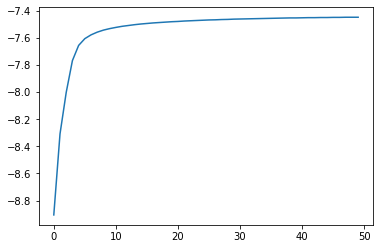

In [22]:
# TODO: Enter code here to generate the convergence plot
model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=50)
llh = parse_logfile()
pd.Series(llh[:50]).plot()

How do you interpret your plot? Based on the plot, what would be a reasonable choice for the number of passes? Retrain your LDA model with that number and re-inspect the topics it finds. Do you consider the new topics to be &lsquo;better&rsquo; than the ones that you got from the 1-pass model in Problem&nbsp;5?

*TODO: Insert your discussion of these questions here*

We can see the model should have reach a convergence in 50-passes. It is obviously to see it reach the convergence after 10 passes. However, it is hard to say when it is exactly converged. We suggest it should be less than 30 passes, and then retrain the model with 10-passes,20-passes and 30-passes. Here are the results. More discussion can be found under the results.

In [23]:
model = LdaModel(
corpus=corpus,
num_topics=num_topics,
id2word=dictionary,
passes=10
)
model.print_topics()

[(0,
  '0.014*"security" + 0.013*"government" + 0.013*"people" + 0.013*"year" + 0.012*"work" + 0.011*"new" + 0.011*"america" + 0.010*"century" + 0.009*"child" + 0.009*"social"'),
 (1,
  '0.028*"america" + 0.022*"world" + 0.014*"american" + 0.013*"people" + 0.011*"year" + 0.011*"nation" + 0.010*"new" + 0.009*"peace" + 0.009*"country" + 0.009*"freedom"'),
 (2,
  '0.034*"child" + 0.028*"care" + 0.025*"health" + 0.023*"work" + 0.021*"family" + 0.018*"year" + 0.017*"million" + 0.014*"americans" + 0.011*"parent" + 0.011*"people"'),
 (3,
  '0.016*"congress" + 0.015*"new" + 0.012*"reform" + 0.011*"act" + 0.011*"ask" + 0.010*"clean" + 0.009*"year" + 0.009*"administration" + 0.008*"pass" + 0.008*"bipartisan"'),
 (4,
  '0.011*"american" + 0.010*"right" + 0.010*"human" + 0.008*"illegal" + 0.007*"problem" + 0.006*"remarkable" + 0.006*"equal" + 0.005*"life" + 0.005*"hold" + 0.005*"country"'),
 (5,
  '0.013*"year" + 0.013*"nation" + 0.013*"nuclear" + 0.013*"energy" + 0.010*"policy" + 0.008*"economic"

In [24]:
model = LdaModel(
corpus=corpus,
num_topics=num_topics,
id2word=dictionary,
passes=20
)
model.print_topics()

[(0,
  '0.033*"work" + 0.029*"child" + 0.020*"people" + 0.016*"family" + 0.015*"care" + 0.014*"year" + 0.013*"welfare" + 0.012*"health" + 0.011*"know" + 0.011*"let"'),
 (1,
  '0.012*"congress" + 0.010*"administration" + 0.010*"reform" + 0.009*"policy" + 0.008*"system" + 0.008*"gun" + 0.008*"increase" + 0.007*"legislation" + 0.007*"new" + 0.007*"year"'),
 (2,
  '0.027*"energy" + 0.010*"house" + 0.009*"conservation" + 0.008*"crime" + 0.008*"action" + 0.007*"food" + 0.007*"senate" + 0.006*"national" + 0.006*"korea" + 0.006*"farm"'),
 (3,
  '0.016*"soviet" + 0.016*"security" + 0.014*"nation" + 0.013*"world" + 0.012*"peace" + 0.012*"military" + 0.010*"force" + 0.010*"defense" + 0.010*"united" + 0.009*"international"'),
 (4,
  '0.022*"year" + 0.021*"program" + 0.013*"new" + 0.013*"government" + 0.013*"federal" + 0.012*"social" + 0.011*"security" + 0.010*"congress" + 0.010*"help" + 0.010*"need"'),
 (5,
  '0.017*"peace" + 0.014*"nato" + 0.013*"woman" + 0.013*"africa" + 0.012*"law" + 0.012*"eur

In [25]:
model = LdaModel(
corpus=corpus,
num_topics=num_topics,
id2word=dictionary,
passes=30
)
model.print_topics()

[(0,
  '0.018*"trade" + 0.018*"new" + 0.017*"world" + 0.016*"country" + 0.012*"america" + 0.011*"nation" + 0.010*"market" + 0.009*"year" + 0.009*"international" + 0.008*"continue"'),
 (1,
  '0.027*"crime" + 0.013*"america" + 0.012*"god" + 0.012*"gun" + 0.011*"police" + 0.011*"law" + 0.009*"thank" + 0.009*"community" + 0.008*"nation" + 0.008*"united"'),
 (2,
  '0.014*"energy" + 0.014*"technology" + 0.011*"nation" + 0.011*"let" + 0.010*"drug" + 0.009*"congress" + 0.008*"america" + 0.008*"life" + 0.008*"science" + 0.008*"national"'),
 (3,
  '0.028*"year" + 0.017*"work" + 0.014*"tax" + 0.013*"budget" + 0.011*"million" + 0.011*"cut" + 0.010*"program" + 0.010*"people" + 0.009*"welfare" + 0.009*"congress"'),
 (4,
  '0.018*"nuclear" + 0.014*"policy" + 0.012*"program" + 0.011*"administration" + 0.010*"act" + 0.010*"continue" + 0.010*"force" + 0.009*"nation" + 0.008*"area" + 0.008*"woman"'),
 (5,
  '0.013*"national" + 0.010*"bipartisan" + 0.008*"government" + 0.008*"world" + 0.008*"effort" + 0.0

It is obviously that all the three models are better than 1-pass model, for they all success in finding new topics, such as "crime","house","peace"and "soviet"(which is combined with "security" here, but not identified in 1-pass model).

And we find that 20-passes model is better than 10-passes model for it identify "clean" "environment". "Peace" and "Nuclear" topics are clustered with more relevent words in 20-passes model too. 

However, "environment" is not identified in 30-passes model. And a brief inspection can show that result of 30-passes model is not as good as 20-passes model, at least not better.

So our conclusion is that the model reach its convergence around 20-passes. More passes might not necessarily lead to better result, though it might lead to better log likelihoods.

## Reflection Questions

**RQ 3.1:** Based on your experiments in Problem 2 and Problem 3, what is the relation between the quality of a clustering and the number of clusters? What happens when the number of clusters is too low, or too high? For this particular data set, what would a be good and optimal number of clusters be?

In the plot we could consider it as elbow method. The sum of squared values increases until some K value but It will saturate after some point. If the number of cluster is smaller than gold-standard clasees,some observations in different class will be forced clusterd into one cluster. If the number of cluster is large, some observations in one same gold-standard classes will be seperated into different clusters,which is observed in problem 2. For this data set,according to rand-index, k=7 is not good enough. But in problem 2 we can see when k=6, the clusters are not as clear as when k=3. In this way, k=3 might be better.

**RQ 3.2:** Explain why it is important to monitor an LDA model for convergence and not simply use, say, 1000 passes. How is the log likelihood used in this context? Were the topics from the multi-pass model 'better' than the topics from the 1-pass model?'

If the number of passes increases, the documents will converge towards on one topic. The topic with all stopwords will be a outcome if the number of passes increase. So, we sould stop increasing the number of passes when the convergence of log likelihood is same between two consecutive iterations.  
The topics from multi pass model is better than the 1 pass model.

**RQ 3.3:** What are the differences between k-means and LDA? When would you use one, when the other?

K means clusters based on N documents into K distinguish clusters.K means will perform better in topics detetction. Lda will assign the documents based on two or more topics. LDA will perform better for documents assigning in multiple topics.

<div class="alert alert-info">
    Please read the section ‘General information’ on the ‘Labs’ page of the course website before submitting this notebook!
</div>